In [18]:
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime

In [19]:
datetime.now()

datetime.datetime(2024, 6, 5, 17, 17, 7, 818996)

In [24]:
# Example OPeNDAP URL (replace with the correct one from your data server)
url = 'https://dapds00.nci.org.au/thredds/dodsC/ub8/au/OzWALD/8day/Ssoil/OzWALD.Ssoil.2020.nc'

# Load the dataset directly from the OPeNDAP URL
ds = xr.open_dataset(url)

In [25]:
ds

<xarray.Dataset> Size: 11GB
Dimensions:    (time: 46, longitude: 8400, latitude: 6800)
Coordinates:
  * time       (time) datetime64[ns] 368B 2020-01-01 2020-01-09 ... 2020-12-26
  * longitude  (longitude) float32 34kB 112.0 112.0 112.0 ... 154.0 154.0 154.0
  * latitude   (latitude) float32 27kB -10.0 -10.01 -10.01 ... -43.99 -44.0
Data variables:
    Ssoil      (time, longitude, latitude) float32 11GB ...
Attributes:
    creator_name:   ANU Centre for Water and Landscape Dynamics
    creator_url:    http://wald.anu.edu.au
    creator_email:  albert.vandijk@anu.edu.au
    institution:    Australian National University
    date_created:   03-Mar-2021
    description:    This product was derived by the ANU OzWALD model-data fus...
    ANU_license:    Creative Commons with Attribution (https://creativecommon...

In [40]:
# Subset the data programmatically after loading
# north, south, west, east = -34.350050, -34.479314, 148.427637, 148.543866
West: 148.427637
North: -34.350050 
East: 148.543866
South: -34.479314
north, south, west, east = -34.350050, -34.479314, 148.427637, 148.543866
time_start, time_end = '2020-01-01T00:00:00', '2020-12-26T00:00:00'

# Select the spatial and temporal subset
subset = ds.sel(longitude=slice(west, east), latitude=slice(north, south))
subset

<xarray.Dataset> Size: 111kB
Dimensions:    (time: 46, longitude: 23, latitude: 26)
Coordinates:
  * time       (time) datetime64[ns] 368B 2020-01-01 2020-01-09 ... 2020-12-26
  * longitude  (longitude) float32 92B 148.4 148.4 148.4 ... 148.5 148.5 148.5
  * latitude   (latitude) float32 104B -34.35 -34.36 -34.36 ... -34.47 -34.48
Data variables:
    Ssoil      (time, longitude, latitude) float32 110kB ...
Attributes:
    creator_name:   ANU Centre for Water and Landscape Dynamics
    creator_url:    http://wald.anu.edu.au
    creator_email:  albert.vandijk@anu.edu.au
    institution:    Australian National University
    date_created:   03-Mar-2021
    description:    This product was derived by the ANU OzWALD model-data fus...
    ANU_license:    Creative Commons with Attribution (https://creativecommon...

In [41]:
soil_moisture = subset['Ssoil']
time = subset['time']
lat = subset['latitude']
lon = subset['longitude']

In [42]:
time_index = 0  
soil_moisture_at_time = soil_moisture.isel(time=time_index)

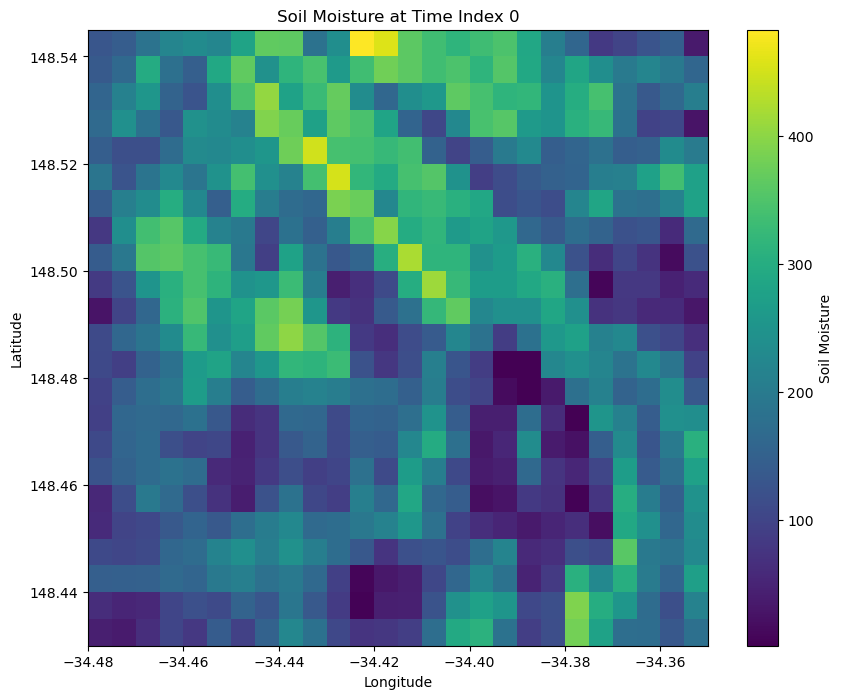

In [43]:
# Plot the 2D map of soil moisture at the selected timepoint
plt.figure(figsize=(10, 8))
plt.pcolormesh(lat, lon, soil_moisture_at_time, shading='nearest')
plt.colorbar(label='Soil Moisture')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Soil Moisture at Time Index {time_index}')
plt.show()

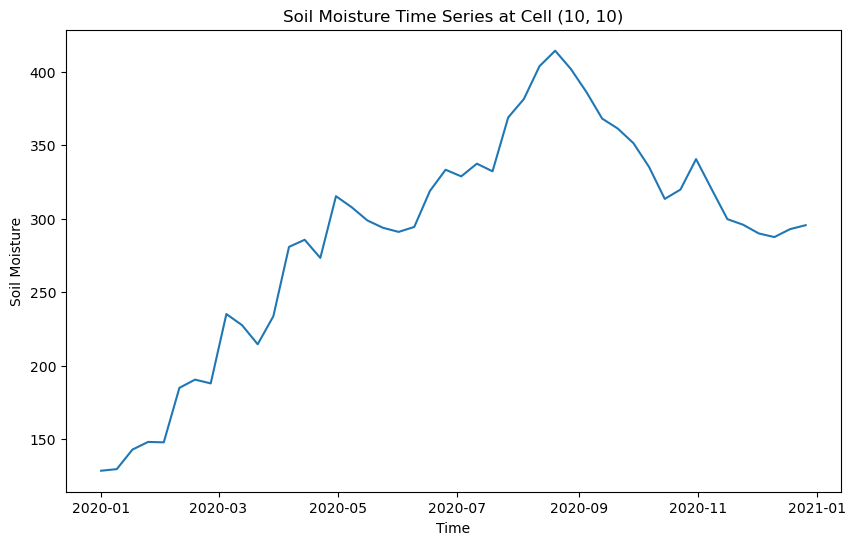

In [44]:
# Select a specific cell (e.g., at index [10, 10])
lat_index = 10
lon_index = 10
soil_moisture_at_cell = soil_moisture[:, lat_index, lon_index]

# Plot the time series of soil moisture at the selected cell
plt.figure(figsize=(10, 6))
plt.plot(time, soil_moisture_at_cell)
plt.xlabel('Time')
plt.ylabel('Soil Moisture')
plt.title(f'Soil Moisture Time Series at Cell ({lat_index}, {lon_index})')
plt.show()